In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import make_classification
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import seaborn as sns
import os
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#Read the CSV file
df = pd.read_csv(r'C:\Users\vivek vivian\Desktop\Uppsala University\Intelligent Interactive Systems\Project\Dataset_Subsystem_2.csv', delimiter=",")

In [42]:
df.head()

,ID,frame,camera_facing_side,gesture,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,12,0,open,palm,494,295,412,266,376,243,...,0,0,0,0,0,0,0,0,0,0
1,12,1,open,palm,493,294,410,266,375,243,...,0,0,0,0,0,0,0,0,0,0
2,12,2,open,palm,493,294,409,267,374,243,...,0,0,0,0,0,0,0,0,0,0
3,12,3,open,palm,492,294,407,267,373,243,...,0,0,0,0,0,0,0,0,0,0
4,12,4,open,palm,491,294,405,267,373,243,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#dir(df)

In [39]:
#df.columns

In [38]:
#df.info()

In [43]:
df.describe()

,ID,frame,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
count,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,...,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000,62219.000000
mean,407.908918,109.383773,145.412687,171.570469,145.707855,144.587152,136.610344,120.598611,133.407159,109.068725,...,125.287243,96.694515,166.575114,144.597213,194.786175,158.681175,147.616709,124.949774,122.346566,106.465292
std,227.855758,73.597621,177.090280,182.003797,173.855570,162.581684,175.611684,147.507254,177.160291,137.322191,...,175.785695,130.409176,179.145705,146.595459,189.871337,132.827455,187.140038,135.291477,178.749349,136.458912
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,396.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,156.000000,152.000000,175.000000,196.000000,0.000000,0.000000,0.000000,0.000000
75%,621.000000,159.000000,274.000000,349.000000,287.000000,310.000000,280.000000,271.000000,280.000000,243.000000,...,240.000000,206.000000,314.000000,285.000000,344.000000,270.000000,288.000000,253.000000,233.000000,234.000000
max,768.000000,490.000000,806.000000,688.000000,722.000000,616.000000,772.000000,571.000000,772.000000,534.000000,...,837.000000,606.000000,850.000000,478.000000,896.000000,513.000000,882.000000,548.000000,909.000000,587.000000


In [8]:
df.dtypes

ID                     int64
frame                  int64
camera_facing_side    object
gesture               object
palm_root_x            int64
                       ...  
dorsal_pinky_2_y       int64
dorsal_pinky_3_x       int64
dorsal_pinky_3_y       int64
dorsal_pinky_4_x       int64
dorsal_pinky_4_y       int64
Length: 84, dtype: object

In [9]:
#sns.distplot(df["palm_thumb_1_x"])

In [44]:
df.shape

(62219, 84)

In [45]:
df.isnull().any()

ID                    False
frame                 False
camera_facing_side    False
gesture               False
palm_root_x           False
                      ...  
dorsal_pinky_2_y      False
dorsal_pinky_3_x      False
dorsal_pinky_3_y      False
dorsal_pinky_4_x      False
dorsal_pinky_4_y      False
Length: 84, dtype: bool

In [12]:
#df.values.shape

In [13]:
#Distribution plot of the different values of temperatures in the data
#plt.figure(figsize=(14,6))
#sns.distplot(df['palm_thumb_1_x'])

In [46]:
df1 = df.drop(['ID','frame'], axis=1)

In [47]:
df1.shape

(62219, 82)

In [48]:
df1.head()

,camera_facing_side,gesture,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open,palm,494,295,412,266,376,243,346,225,...,0,0,0,0,0,0,0,0,0,0
1,open,palm,493,294,410,266,375,243,345,225,...,0,0,0,0,0,0,0,0,0,0
2,open,palm,493,294,409,267,374,243,344,225,...,0,0,0,0,0,0,0,0,0,0
3,open,palm,492,294,407,267,373,243,343,225,...,0,0,0,0,0,0,0,0,0,0
4,open,palm,491,294,405,267,373,243,342,225,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#df.loc[:, ['camera_facing_side', 'gesture']]

In [49]:
df1 =df1.assign(merge_value= df1.camera_facing_side +' '+ df.gesture.astype(str))
df1.tail(5)

,camera_facing_side,gesture,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y,merge_value
62214,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,304,363,287,329,0,0,0,0,three_fingers dorsal
62215,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,305,363,287,330,0,0,0,0,three_fingers dorsal
62216,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,306,364,287,331,0,0,0,0,three_fingers dorsal
62217,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,307,365,287,332,0,0,0,0,three_fingers dorsal
62218,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,308,366,287,332,0,0,0,0,three_fingers dorsal


In [50]:
df1 = df.drop(['ID','frame'], axis=1)
df1 =df1.assign(merge_value= df1.camera_facing_side +' '+ df.gesture.astype(str))
df1.head(5)

,camera_facing_side,gesture,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y,merge_value
0,open,palm,494,295,412,266,376,243,346,225,...,0,0,0,0,0,0,0,0,0,open palm
1,open,palm,493,294,410,266,375,243,345,225,...,0,0,0,0,0,0,0,0,0,open palm
2,open,palm,493,294,409,267,374,243,344,225,...,0,0,0,0,0,0,0,0,0,open palm
3,open,palm,492,294,407,267,373,243,343,225,...,0,0,0,0,0,0,0,0,0,open palm
4,open,palm,491,294,405,267,373,243,342,225,...,0,0,0,0,0,0,0,0,0,open palm


In [51]:
df1 = df1.drop(['camera_facing_side','gesture'], axis=1)

In [52]:
df1.head(5)

,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,palm_index_1_y,...,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y,merge_value
0,494,295,412,266,376,243,346,225,434,186,...,0,0,0,0,0,0,0,0,0,open palm
1,493,294,410,266,375,243,345,225,433,185,...,0,0,0,0,0,0,0,0,0,open palm
2,493,294,409,267,374,243,344,225,432,185,...,0,0,0,0,0,0,0,0,0,open palm
3,492,294,407,267,373,243,343,225,431,184,...,0,0,0,0,0,0,0,0,0,open palm
4,491,294,405,267,373,243,342,225,430,183,...,0,0,0,0,0,0,0,0,0,open palm


In [53]:
df1 = df1.set_index('merge_value')

In [54]:
df1.head(5)

,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,palm_index_1_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
merge_value,,,,,,,,,,,,,,,,,,,,,
open palm,494,295,412,266,376,243,346,225,434,186,...,0,0,0,0,0,0,0,0,0,0
open palm,493,294,410,266,375,243,345,225,433,185,...,0,0,0,0,0,0,0,0,0,0
open palm,493,294,409,267,374,243,344,225,432,185,...,0,0,0,0,0,0,0,0,0,0
open palm,492,294,407,267,373,243,343,225,431,184,...,0,0,0,0,0,0,0,0,0,0
open palm,491,294,405,267,373,243,342,225,430,183,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#df1.dtypes

In [55]:
df1.reset_index()

,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open palm,494,295,412,266,376,243,346,225,434,...,0,0,0,0,0,0,0,0,0,0
1,open palm,493,294,410,266,375,243,345,225,433,...,0,0,0,0,0,0,0,0,0,0
2,open palm,493,294,409,267,374,243,344,225,432,...,0,0,0,0,0,0,0,0,0,0
3,open palm,492,294,407,267,373,243,343,225,431,...,0,0,0,0,0,0,0,0,0,0
4,open palm,491,294,405,267,373,243,342,225,430,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62214,three_fingers dorsal,0,0,0,0,0,0,0,0,0,...,0,0,304,363,287,329,0,0,0,0
62215,three_fingers dorsal,0,0,0,0,0,0,0,0,0,...,0,0,305,363,287,330,0,0,0,0
62216,three_fingers dorsal,0,0,0,0,0,0,0,0,0,...,0,0,306,364,287,331,0,0,0,0
62217,three_fingers dorsal,0,0,0,0,0,0,0,0,0,...,0,0,307,365,287,332,0,0,0,0


In [57]:
 #df1.index.values

In [31]:
#df1.groupby(['merge_value']).count()

In [32]:
#df1.head(5)

In [58]:
df1.isnull().sum()

palm_root_x         0
palm_root_y         0
palm_thumb_1_x      0
palm_thumb_1_y      0
palm_thumb_2_x      0
                   ..
dorsal_pinky_2_y    0
dorsal_pinky_3_x    0
dorsal_pinky_3_y    0
dorsal_pinky_4_x    0
dorsal_pinky_4_y    0
Length: 80, dtype: int64

In [59]:
#sns.heatmap(df1.isnull(), yticklabels==False)

In [60]:
df2 = df1.reset_index()

In [61]:
df2.head(5)

,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open palm,494,295,412,266,376,243,346,225,434,...,0,0,0,0,0,0,0,0,0,0
1,open palm,493,294,410,266,375,243,345,225,433,...,0,0,0,0,0,0,0,0,0,0
2,open palm,493,294,409,267,374,243,344,225,432,...,0,0,0,0,0,0,0,0,0,0
3,open palm,492,294,407,267,373,243,343,225,431,...,0,0,0,0,0,0,0,0,0,0
4,open palm,491,294,405,267,373,243,342,225,430,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#dir(df2)

In [63]:
df4 = pd.DataFrame(df2, columns=df2.columns)
df4.head(5)

,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open palm,494,295,412,266,376,243,346,225,434,...,0,0,0,0,0,0,0,0,0,0
1,open palm,493,294,410,266,375,243,345,225,433,...,0,0,0,0,0,0,0,0,0,0
2,open palm,493,294,409,267,374,243,344,225,432,...,0,0,0,0,0,0,0,0,0,0
3,open palm,492,294,407,267,373,243,343,225,431,...,0,0,0,0,0,0,0,0,0,0
4,open palm,491,294,405,267,373,243,342,225,430,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df4['merge_value_names'] = df4['merge_value'] 

In [65]:
df4.head(5)

,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,...,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y,merge_value_names
0,open palm,494,295,412,266,376,243,346,225,434,...,0,0,0,0,0,0,0,0,0,open palm
1,open palm,493,294,410,266,375,243,345,225,433,...,0,0,0,0,0,0,0,0,0,open palm
2,open palm,493,294,409,267,374,243,344,225,432,...,0,0,0,0,0,0,0,0,0,open palm
3,open palm,492,294,407,267,373,243,343,225,431,...,0,0,0,0,0,0,0,0,0,open palm
4,open palm,491,294,405,267,373,243,342,225,430,...,0,0,0,0,0,0,0,0,0,open palm


In [66]:
#list(df4.columns.values)

In [67]:
cols = list(df4.columns)
cols = [cols[-1]] + cols[:-1]
df4 = df4[cols]

In [68]:
df4.head(5)

,merge_value_names,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open palm,open palm,494,295,412,266,376,243,346,225,...,0,0,0,0,0,0,0,0,0,0
1,open palm,open palm,493,294,410,266,375,243,345,225,...,0,0,0,0,0,0,0,0,0,0
2,open palm,open palm,493,294,409,267,374,243,344,225,...,0,0,0,0,0,0,0,0,0,0
3,open palm,open palm,492,294,407,267,373,243,343,225,...,0,0,0,0,0,0,0,0,0,0
4,open palm,open palm,491,294,405,267,373,243,342,225,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#df4.loc[0:5,'merge_value'] = '0'

In [29]:
#df4.head(7)

In [69]:
df4.loc[df4['merge_value'] == 'open palm', 'merge_value'] = 0

In [70]:
df4.loc[df4['merge_value'] == 'open dorsal', 'merge_value'] = 1

In [71]:
df4.loc[df4['merge_value'] == 'fist palm', 'merge_value'] = 2

In [72]:
df4.loc[df4['merge_value'] == 'fist dorsal', 'merge_value'] = 3

In [73]:
df4.loc[df4['merge_value'] == 'three_fingers palm', 'merge_value'] = 4

In [74]:
df4.loc[df4['merge_value'] == 'three_fingers dorsal', 'merge_value'] = 5

In [75]:
df4.merge_value.unique()

array([0, 1, 2, 3, 4, 5], dtype=object)

In [76]:
df4.tail()

,merge_value_names,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
62214,three_fingers dorsal,5,0,0,0,0,0,0,0,0,...,0,0,304,363,287,329,0,0,0,0
62215,three_fingers dorsal,5,0,0,0,0,0,0,0,0,...,0,0,305,363,287,330,0,0,0,0
62216,three_fingers dorsal,5,0,0,0,0,0,0,0,0,...,0,0,306,364,287,331,0,0,0,0
62217,three_fingers dorsal,5,0,0,0,0,0,0,0,0,...,0,0,307,365,287,332,0,0,0,0
62218,three_fingers dorsal,5,0,0,0,0,0,0,0,0,...,0,0,308,366,287,332,0,0,0,0


In [77]:
df4[df4.merge_value==0].head()

,merge_value_names,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open palm,0,494,295,412,266,376,243,346,225,...,0,0,0,0,0,0,0,0,0,0
1,open palm,0,493,294,410,266,375,243,345,225,...,0,0,0,0,0,0,0,0,0,0
2,open palm,0,493,294,409,267,374,243,344,225,...,0,0,0,0,0,0,0,0,0,0
3,open palm,0,492,294,407,267,373,243,343,225,...,0,0,0,0,0,0,0,0,0,0
4,open palm,0,491,294,405,267,373,243,342,225,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df4.groupby('merge_value_names').size()

merge_value_names
fist dorsal             10351
fist palm                9940
open dorsal             10854
open palm               10815
three_fingers dorsal    10523
three_fingers palm       9736
dtype: int64

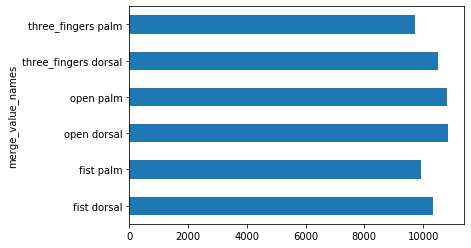

In [79]:
df4.groupby("merge_value_names").size().plot(kind='barh')

In [80]:
#plt.style.use('seaborn-white')
#df4.groupby("merge_value_names").size().plot.box()

In [81]:
#df4.groupby("merge_value_names").size().plot.area(stacked=False)

In [82]:
#df4.groupby("merge_value_names").size().diff().hist(alpha=0.5, bins=50)

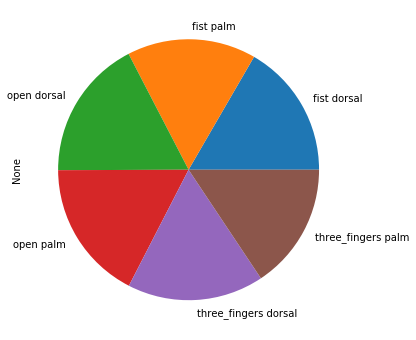

In [83]:
df4.groupby("merge_value_names").size().plot.pie(figsize=(6, 6))

In [13]:
#df4.groupby("merge_value_names").size().plot.pie(figsize=(8,8),autopct='%.2f',fontsize=20)

In [14]:
#df4.groupby("merge_value_names").size().plot.bar(colormap='Dark2')

In [15]:
#df4.groupby("merge_value_names").size().plot(kind='density', layout=(2,2))
#plt.show()

In [16]:
#plt.style.use('ggplot')
#df4.groupby("merge_value_names").size().plot(kind='bar')

In [84]:
#df4.plot(kind = 'box', subplots=True, layout=(40,40), sharex=False, sharey=False)
df4.head()

,merge_value_names,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open palm,0,494,295,412,266,376,243,346,225,...,0,0,0,0,0,0,0,0,0,0
1,open palm,0,493,294,410,266,375,243,345,225,...,0,0,0,0,0,0,0,0,0,0
2,open palm,0,493,294,409,267,374,243,344,225,...,0,0,0,0,0,0,0,0,0,0
3,open palm,0,492,294,407,267,373,243,343,225,...,0,0,0,0,0,0,0,0,0,0
4,open palm,0,491,294,405,267,373,243,342,225,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#df00 = df4[df4.merge_value==0]
#df01 = df4[df4.merge_value==1]
#df02 = df4[df4.merge_value==2]
#df03 = df4[df4.merge_value==3]
#df04 = df4[df4.merge_value==4]
#df05 = df4[df4.merge_value==5]

In [18]:
#plt.scatter(df00['palm_ring_1_x'], df00['palm_ring_1_y'], color = 'green', marker = '+')
#plt.scatter(df01['palm_ring_1_x'], df01['palm_ring_1_y'], color = 'blue', marker = '.')

In [85]:
x = df4.drop(['merge_value_names', 'merge_value'], axis='columns')
x.head()

,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,palm_index_1_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,494,295,412,266,376,243,346,225,434,186,...,0,0,0,0,0,0,0,0,0,0
1,493,294,410,266,375,243,345,225,433,185,...,0,0,0,0,0,0,0,0,0,0
2,493,294,409,267,374,243,344,225,432,185,...,0,0,0,0,0,0,0,0,0,0
3,492,294,407,267,373,243,343,225,431,184,...,0,0,0,0,0,0,0,0,0,0
4,491,294,405,267,373,243,342,225,430,183,...,0,0,0,0,0,0,0,0,0,0


In [86]:
y = df4.merge_value
y

0        0
1        0
2        0
3        0
4        0
        ..
62214    5
62215    5
62216    5
62217    5
62218    5
Name: merge_value, Length: 62219, dtype: object

In [87]:
y.unique()

array([0, 1, 2, 3, 4, 5], dtype=object)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [89]:
len(X_train)

49775

In [90]:
len(X_test)

12444

In [91]:
a = len(X_train) + len(X_test)
a

62219

In [92]:
model = SVC()

In [93]:
#model.fit(X_train, y_train)

In [94]:
y.dtypes

dtype('O')

In [95]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: merge_value, dtype: object

In [96]:
y=y.astype('int')

In [97]:
y.tail()

62214    5
62215    5
62216    5
62217    5
62218    5
Name: merge_value, dtype: int32

In [98]:
x.head(5)

,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,palm_index_1_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,494,295,412,266,376,243,346,225,434,186,...,0,0,0,0,0,0,0,0,0,0
1,493,294,410,266,375,243,345,225,433,185,...,0,0,0,0,0,0,0,0,0,0
2,493,294,409,267,374,243,344,225,432,185,...,0,0,0,0,0,0,0,0,0,0
3,492,294,407,267,373,243,343,225,431,184,...,0,0,0,0,0,0,0,0,0,0
4,491,294,405,267,373,243,342,225,430,183,...,0,0,0,0,0,0,0,0,0,0


In [99]:
z = df4.merge_value_names
z

0                   open palm
1                   open palm
2                   open palm
3                   open palm
4                   open palm
                 ...         
62214    three_fingers dorsal
62215    three_fingers dorsal
62216    three_fingers dorsal
62217    three_fingers dorsal
62218    three_fingers dorsal
Name: merge_value_names, Length: 62219, dtype: object

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [101]:
y_test

4999     5
22522    4
17288    2
37921    0
1083     4
        ..
49326    0
30123    0
45946    3
47658    3
50503    3
Name: merge_value, Length: 12444, dtype: int32

In [102]:
model = SVC()

In [103]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
model.score(X_test,y_test)

1.0

In [120]:
#X_test_new = pd.read_csv('cntrs.csv')
#X_test_new = X_test_new.astype('int')
#X_test

In [121]:
y_pred = model.predict(X_test)

In [122]:
y_pred

array([5, 4, 2, ..., 3, 3, 3])

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2157
           1       1.00      1.00      1.00      2138
           2       1.00      1.00      1.00      1988
           3       1.00      1.00      1.00      2064
           4       1.00      1.00      1.00      1988
           5       1.00      1.00      1.00      2109

    accuracy                           1.00     12444
   macro avg       1.00      1.00      1.00     12444
weighted avg       1.00      1.00      1.00     12444



In [124]:
hamming_loss(y_test, y_pred)

0.0

In [125]:
confusion_matrix(y_test, y_pred)

array([[2157,    0,    0,    0,    0,    0],
       [   0, 2138,    0,    0,    0,    0],
       [   0,    0, 1988,    0,    0,    0],
       [   0,    0,    0, 2064,    0,    0],
       [   0,    0,    0,    0, 1988,    0],
       [   0,    0,    0,    0,    0, 2109]], dtype=int64)

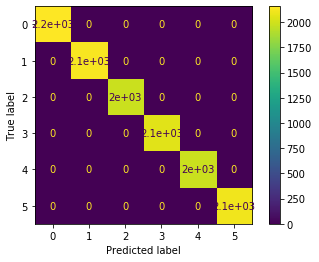

In [126]:
cm = plot_confusion_matrix(model, X_test, y_pred) # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [129]:
import pickle
filename = 'SVC_mode.sav'
pickle.dump(model, open(filename, 'wb'))

In [135]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

1.0


In [169]:
X_test_new = pd.read_csv('pred.csv')

In [170]:
X_test_new.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79
0,97,143,94,146,94,147,93,148,93,150,...,74,176,74,173,73,172,73,170,72,169


In [171]:
X_test_new.astype('int')

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79
0,97,143,94,146,94,147,93,148,93,150,...,74,176,74,173,73,172,73,170,72,169


In [172]:
pred = model.predict(X_test_new)
pred

array([1])

In [90]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names=[]
for name, model in models:
    Kf = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=Kf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LR : 1.000000 (0.000000)
LDA : 1.000000 (0.000000)
CART : 1.000000 (0.000000)
NB : 0.829071 (0.003082)


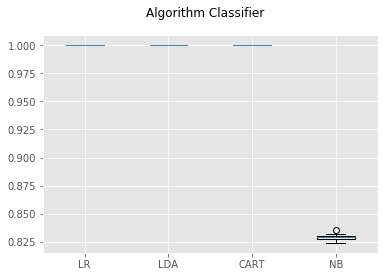

In [91]:
fig = plt.figure()
fig.suptitle('Algorithm Classifier')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [92]:
model = Sequential()

model.add(Dense(80,input_shape=(80,),activation='relu'))
#model.add(Dense(8,activation='tanh'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 81        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(X_train,y_train,epochs=100)

ValueError: You are passing a target array of shape (49775, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [4]:
df = pd.read_csv("cntrss.csv")

In [6]:
df.columns[:2]

Index(['[[ 76 137]]', '[[ 75 138]]'], dtype='object')